In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import os 
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import geopandas as gpd
import contextily as ctx

In [2]:
yesterday_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
yesterday_date

'2024-03-18'

In [3]:
dialect = 'mysql+pymysql'
user = 'root'
password = os.getenv('mdp_mySQL')
host = 'localhost'
port = 3306
database_idf = 'SNCF_TGV_TER'

engine_url = f"{dialect}://{user}:{password}@{host}:{port}/{database_idf}"
engine = create_engine(engine_url)

In [4]:
query_disruption = f"""
SELECT * FROM disruptions_tgv_ter
WHERE data_date = '{yesterday_date}'
"""

df_disruption = pd.read_sql_query(query_disruption, engine)
df_disruption

,id_disruption,vehicle_id,train_type,id_stop,name_stop,lon,lat,disruption_start,disruption_end,arrival_delay,departure_delay,cause_delay,data_date
0,300d66cc-2614-4087-89d7-89abe997e2cf,SNCF:2024-03-18:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.320510,48.8412,2024-03-18 18:46:00,2024-03-18 21:49:00,50.0,50.0,Défaut d'alimentation électrique,2024-03-18
1,300d66cc-2614-4087-89d7-89abe997e2cf,SNCF:2024-03-18:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87393702:LongDistanceTrain,Massy TGV,2.261250,48.7258,2024-03-18 18:46:00,2024-03-18 21:49:00,50.0,50.0,Défaut d'alimentation électrique,2024-03-18
2,300d66cc-2614-4087-89d7-89abe997e2cf,SNCF:2024-03-18:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87581009:LongDistanceTrain,Bordeaux Saint-Jean,-0.556697,44.8259,2024-03-18 18:46:00,2024-03-18 21:49:00,0.0,0.0,Défaut d'alimentation électrique,2024-03-18
3,dc1eeb61-3ef0-4bfe-b63b-8d52ec7577c5,SNCF:2024-03-18:12254:1187:LongDistanceTrain,TGV,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.320510,48.8412,2024-03-18 10:46:00,2024-03-18 12:58:00,5.0,5.0,Régulation du trafic,2024-03-18
4,dc1eeb61-3ef0-4bfe-b63b-8d52ec7577c5,SNCF:2024-03-18:12254:1187:LongDistanceTrain,TGV,stop_point:SNCF:87581009:LongDistanceTrain,Bordeaux Saint-Jean,-0.556697,44.8259,2024-03-18 10:46:00,2024-03-18 12:58:00,0.0,0.0,Régulation du trafic,2024-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763,6b89d381-b6be-4159-a224-6f5a1809b032,SNCF:2024-03-18:9838:1187:LongDistanceTrain,TGV,stop_point:SNCF:87393702:LongDistanceTrain,Massy TGV,2.261250,48.7258,2024-03-18 16:55:00,2024-03-18 21:34:00,5.0,5.0,None,2024-03-18
5764,6b89d381-b6be-4159-a224-6f5a1809b032,SNCF:2024-03-18:9838:1187:LongDistanceTrain,TGV,stop_point:SNCF:87396002:LongDistanceTrain,Le Mans,0.192614,47.9956,2024-03-18 16:55:00,2024-03-18 21:34:00,5.0,5.0,None,2024-03-18
5765,6b89d381-b6be-4159-a224-6f5a1809b032,SNCF:2024-03-18:9838:1187:LongDistanceTrain,TGV,stop_point:SNCF:87471003:LongDistanceTrain,Rennes,-1.672740,48.1035,2024-03-18 16:55:00,2024-03-18 21:34:00,5.0,5.0,None,2024-03-18
5766,6b89d381-b6be-4159-a224-6f5a1809b032,SNCF:2024-03-18:9838:1187:LongDistanceTrain,TGV,stop_point:SNCF:87478404:LongDistanceTrain,Laval,-0.760929,48.0763,2024-03-18 16:55:00,2024-03-18 21:34:00,5.0,5.0,None,2024-03-18


In [5]:
query_vehicle = f"""
SELECT * FROM vehicle_journeys_tgv_ter
WHERE data_date = '{yesterday_date}'
"""

df_vehicle = pd.read_sql_query(query_vehicle, engine)
df_vehicle

,vehicle_id,route_id,time_begin,time_end,train_type,id_disruption,data_date
0,vehicle_journey:SNCF:2024-03-18:117752:1187:Lo...,route:SNCF:FR:Line::B10C45A0-C32C-4232-85F2-4B...,0 days 05:00:00,0 days 07:19:00,Train grande vitesse,0f4e5f2c-a148-438f-b7cb-71b80199e8d4,2024-03-18
1,vehicle_journey:SNCF:2024-03-18:12244:1187:Lon...,route:SNCF:CSR:421400,0 days 18:46:00,0 days 20:59:00,Train grande vitesse,300d66cc-2614-4087-89d7-89abe997e2cf,2024-03-18
2,vehicle_journey:SNCF:2024-03-18:12251:1187:Lon...,route:SNCF:CSR:421400,0 days 07:04:00,0 days 09:14:00,Train grande vitesse,None,2024-03-18
3,vehicle_journey:SNCF:2024-03-18:12254:1187:Lon...,route:SNCF:CSR:421400,0 days 10:46:00,0 days 12:53:00,Train grande vitesse,dc1eeb61-3ef0-4bfe-b63b-8d52ec7577c5,2024-03-18
4,vehicle_journey:SNCF:2024-03-18:12255:1187:Lon...,route:SNCF:CSR:421400,0 days 11:04:00,0 days 13:14:00,Train grande vitesse,None,2024-03-18
...,...,...,...,...,...,...,...
8924,vehicle_journey:SNCF:2024-03-18:9896:1187:Long...,route:SNCF:CSR:071100,0 days 15:56:00,0 days 23:49:00,Train grande vitesse,None,2024-03-18
8925,vehicle_journey:SNCF:2024-03-18:9898:1187:Long...,route:SNCF:CSR:071200,0 days 06:31:00,0 days 14:15:00,Train grande vitesse,None,2024-03-18
8926,vehicle_journey:SNCF:2024-03-18:9916:0018:Long...,route:SNCF:0018-84000588-87111849,0 days 07:11:00,0 days 11:05:00,Train grande vitesse,None,2024-03-18
8927,vehicle_journey:SNCF:2024-03-18:9937:0018:Long...,route:SNCF:0018-87111849-84000588,0 days 11:43:00,0 days 15:14:00,Train grande vitesse,None,2024-03-18


In [6]:
df_lines = pd.read_sql_table('pt_lines_tgv_ter', engine)
df_lines

,route_id,route_name,train_type,network_name,opening_time,closing_time
0,route:SNCF:0018-80100537-87271007,Dortmund Hbf - Paris Nord,Train grande vitesse,Eurostar,05:18:00,12:21:00
1,route:SNCF:0018-80101840-87271007,Essen Hbf - Paris Nord,Train grande vitesse,Eurostar,07:35:00,22:14:00
2,route:SNCF:0018-80154583-87271007,Köln - Hauptbahnhof - Paris Nord,Train grande vitesse,Eurostar,05:21:00,23:14:00
3,route:SNCF:0018-84000588-87111849,Amsterdam Centraal - Marne-la-Vallée - Chessy,Train grande vitesse,Eurostar,06:47:00,11:05:00
4,route:SNCF:0018-84000588-87271007,Amsterdam Centraal - Paris Nord,Train grande vitesse,Eurostar,06:11:00,23:43:00
...,...,...,...,...,...,...
363,route:stop_area:SNCF:87113001_stop_area:SNCF:8...,Paris Est - Strasbourg,Train grande vitesse,additional service,None,None
364,route:stop_area:SNCF:87394007_stop_area:SNCF:8...,Chartres - Versailles Chantiers,Train grande vitesse,additional service,None,None
365,route:stop_area:SNCF:87411017_stop_area:SNCF:8...,Rouen Rive Droite - Paris Saint-Lazare,Train grande vitesse,additional service,None,None
366,route:stop_area:SNCF:87411017_stop_area:SNCF:8...,Rouen Rive Droite - Le Havre,Train grande vitesse,additional service,None,None


# NOMBRE DE PERTURBATION

In [14]:
nb_disruption = len(df_disruption['id_disruption'].unique())
print("nombre de perturbation : " + str(nb_disruption))

nombre de perturbation :659


# POURCENTAGE TRAJET IMPACTE

In [22]:
nb_vehicle_journeys = len(df_vehicle)
print("nombre de trajet : " + str(nb_vehicle_journeys))

impacted_journeys = df_vehicle['id_disruption'].notnull().sum()
print("nombre de trajet impacté : " + str(impacted_journeys))

per_impacted = impacted_journeys/nb_vehicle_journeys*100
print("pourcentage de trajet impacté : " + str(round(per_impacted,2)) + "%")

nombre de trajet : 8929
nombre de trajet impacté : 1214
pourcentage de trajet impacté : 13.6%


# Temps total de perturbation


In [24]:
df_disruption['duration'] = df_disruption['disruption_end'] - df_disruption['disruption_start']
df_disruption_unique = df_disruption[~df_disruption.duplicated(subset=['id_disruption'], keep='first')]
total_disruption_duration =  df_disruption_unique['duration'].sum()
print("temps cumulé de perturbation : " +  str(total_disruption_duration))

temps cumulé de perturbation : 53 days 02:10:00


# Information sur la première perturbation de la journée

In [26]:
df_vehicle['vehicle_id'] = df_vehicle['vehicle_id'].apply(lambda x: ':'.join(x.split(':')[1:]))
df_vehicle

,vehicle_id,route_id,time_begin,time_end,train_type,id_disruption,data_date
0,SNCF:2024-03-18:117752:1187:LongDistanceTrain,route:SNCF:FR:Line::B10C45A0-C32C-4232-85F2-4B...,0 days 05:00:00,0 days 07:19:00,Train grande vitesse,0f4e5f2c-a148-438f-b7cb-71b80199e8d4,2024-03-18
1,SNCF:2024-03-18:12244:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 18:46:00,0 days 20:59:00,Train grande vitesse,300d66cc-2614-4087-89d7-89abe997e2cf,2024-03-18
2,SNCF:2024-03-18:12251:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 07:04:00,0 days 09:14:00,Train grande vitesse,None,2024-03-18
3,SNCF:2024-03-18:12254:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 10:46:00,0 days 12:53:00,Train grande vitesse,dc1eeb61-3ef0-4bfe-b63b-8d52ec7577c5,2024-03-18
4,SNCF:2024-03-18:12255:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 11:04:00,0 days 13:14:00,Train grande vitesse,None,2024-03-18
...,...,...,...,...,...,...,...
8924,SNCF:2024-03-18:9896:1187:LongDistanceTrain,route:SNCF:CSR:071100,0 days 15:56:00,0 days 23:49:00,Train grande vitesse,None,2024-03-18
8925,SNCF:2024-03-18:9898:1187:LongDistanceTrain,route:SNCF:CSR:071200,0 days 06:31:00,0 days 14:15:00,Train grande vitesse,None,2024-03-18
8926,SNCF:2024-03-18:9916:0018:LongDistanceTrain,route:SNCF:0018-84000588-87111849,0 days 07:11:00,0 days 11:05:00,Train grande vitesse,None,2024-03-18
8927,SNCF:2024-03-18:9937:0018:LongDistanceTrain,route:SNCF:0018-87111849-84000588,0 days 11:43:00,0 days 15:14:00,Train grande vitesse,None,2024-03-18


In [27]:
df_merge_inter = pd.merge(df_disruption, df_vehicle[['route_id', 'vehicle_id']], on='vehicle_id', how='left')
df_disruption_merge = pd.merge(df_merge_inter, df_lines[['route_id', 'route_name', 'network_name']], on='route_id', how='left')
df_disruption_merge

,id_disruption,vehicle_id,train_type,id_stop,name_stop,lon,lat,disruption_start,disruption_end,arrival_delay,departure_delay,cause_delay,data_date,duration,route_id,route_name,network_name
0,300d66cc-2614-4087-89d7-89abe997e2cf,SNCF:2024-03-18:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.320510,48.8412,2024-03-18 18:46:00,2024-03-18 21:49:00,50.0,50.0,Défaut d'alimentation électrique,2024-03-18,0 days 03:03:00,route:SNCF:CSR:421400,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI
1,300d66cc-2614-4087-89d7-89abe997e2cf,SNCF:2024-03-18:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87393702:LongDistanceTrain,Massy TGV,2.261250,48.7258,2024-03-18 18:46:00,2024-03-18 21:49:00,50.0,50.0,Défaut d'alimentation électrique,2024-03-18,0 days 03:03:00,route:SNCF:CSR:421400,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI
2,300d66cc-2614-4087-89d7-89abe997e2cf,SNCF:2024-03-18:12244:1187:LongDistanceTrain,TGV,stop_point:SNCF:87581009:LongDistanceTrain,Bordeaux Saint-Jean,-0.556697,44.8259,2024-03-18 18:46:00,2024-03-18 21:49:00,0.0,0.0,Défaut d'alimentation électrique,2024-03-18,0 days 03:03:00,route:SNCF:CSR:421400,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI
3,dc1eeb61-3ef0-4bfe-b63b-8d52ec7577c5,SNCF:2024-03-18:12254:1187:LongDistanceTrain,TGV,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.320510,48.8412,2024-03-18 10:46:00,2024-03-18 12:58:00,5.0,5.0,Régulation du trafic,2024-03-18,0 days 02:12:00,route:SNCF:CSR:421400,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI
4,dc1eeb61-3ef0-4bfe-b63b-8d52ec7577c5,SNCF:2024-03-18:12254:1187:LongDistanceTrain,TGV,stop_point:SNCF:87581009:LongDistanceTrain,Bordeaux Saint-Jean,-0.556697,44.8259,2024-03-18 10:46:00,2024-03-18 12:58:00,0.0,0.0,Régulation du trafic,2024-03-18,0 days 02:12:00,route:SNCF:CSR:421400,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763,6b89d381-b6be-4159-a224-6f5a1809b032,SNCF:2024-03-18:9838:1187:LongDistanceTrain,TGV,stop_point:SNCF:87393702:LongDistanceTrain,Massy TGV,2.261250,48.7258,2024-03-18 16:55:00,2024-03-18 21:34:00,5.0,5.0,None,2024-03-18,0 days 04:39:00,route:SNCF:CSR:003300,Bruxelles-Midi / Brussel-Zuid - Rennes,TGV INOUI
5764,6b89d381-b6be-4159-a224-6f5a1809b032,SNCF:2024-03-18:9838:1187:LongDistanceTrain,TGV,stop_point:SNCF:87396002:LongDistanceTrain,Le Mans,0.192614,47.9956,2024-03-18 16:55:00,2024-03-18 21:34:00,5.0,5.0,None,2024-03-18,0 days 04:39:00,route:SNCF:CSR:003300,Bruxelles-Midi / Brussel-Zuid - Rennes,TGV INOUI
5765,6b89d381-b6be-4159-a224-6f5a1809b032,SNCF:2024-03-18:9838:1187:LongDistanceTrain,TGV,stop_point:SNCF:87471003:LongDistanceTrain,Rennes,-1.672740,48.1035,2024-03-18 16:55:00,2024-03-18 21:34:00,5.0,5.0,None,2024-03-18,0 days 04:39:00,route:SNCF:CSR:003300,Bruxelles-Midi / Brussel-Zuid - Rennes,TGV INOUI
5766,6b89d381-b6be-4159-a224-6f5a1809b032,SNCF:2024-03-18:9838:1187:LongDistanceTrain,TGV,stop_point:SNCF:87478404:LongDistanceTrain,Laval,-0.760929,48.0763,2024-03-18 16:55:00,2024-03-18 21:34:00,5.0,5.0,None,2024-03-18,0 days 04:39:00,route:SNCF:CSR:003300,Bruxelles-Midi / Brussel-Zuid - Rennes,TGV INOUI


In [32]:
index_first_disruption = df_disruption_merge.loc[df_disruption_merge['disruption_start'] >= yesterday_date]['disruption_start'].idxmin()

hour_first_disruption = df_disruption_merge['disruption_start'][index_first_disruption]
print("horraire de la première perturbation de la journée : " + str(hour_first_disruption))

cause_first_disruption = df_disruption_merge['cause_delay'][index_first_disruption]
print("cause de la perturbation : " + str(cause_first_disruption))

route_first_disruption = df_disruption_merge['route_name'][index_first_disruption]
print("nom de la ligne impactée : " + str(route_first_disruption))

network_first_disruption = df_disruption_merge['network_name'][index_first_disruption]
print("réseau : " + str(network_first_disruption))

horraire de la première perturbation de la journée : 2024-03-18 04:51:00
cause de la perturbation : Travaux sur les voies
nom de la ligne impactée : K40
réseau : TER HDF


# Réseaux les plus perturbés en pourcentage (test graphique)


In [33]:
df_vehicle_merge = pd.merge(df_vehicle, df_lines[['route_id', 'route_name', 'network_name']], on='route_id', how='left')
df_vehicle_merge

,vehicle_id,route_id,time_begin,time_end,train_type,id_disruption,data_date,route_name,network_name
0,SNCF:2024-03-18:117752:1187:LongDistanceTrain,route:SNCF:FR:Line::B10C45A0-C32C-4232-85F2-4B...,0 days 05:00:00,0 days 07:19:00,Train grande vitesse,0f4e5f2c-a148-438f-b7cb-71b80199e8d4,2024-03-18,NaN,NaN
1,SNCF:2024-03-18:12244:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 18:46:00,0 days 20:59:00,Train grande vitesse,300d66cc-2614-4087-89d7-89abe997e2cf,2024-03-18,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI
2,SNCF:2024-03-18:12251:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 07:04:00,0 days 09:14:00,Train grande vitesse,None,2024-03-18,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI
3,SNCF:2024-03-18:12254:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 10:46:00,0 days 12:53:00,Train grande vitesse,dc1eeb61-3ef0-4bfe-b63b-8d52ec7577c5,2024-03-18,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI
4,SNCF:2024-03-18:12255:1187:LongDistanceTrain,route:SNCF:CSR:421400,0 days 11:04:00,0 days 13:14:00,Train grande vitesse,None,2024-03-18,Paris - Montparnasse - Hall 1 & 2 - Bordeaux S...,TGV INOUI
...,...,...,...,...,...,...,...,...,...
8924,SNCF:2024-03-18:9896:1187:LongDistanceTrain,route:SNCF:CSR:071100,0 days 15:56:00,0 days 23:49:00,Train grande vitesse,None,2024-03-18,Nancy - Nice,TGV INOUI
8925,SNCF:2024-03-18:9898:1187:LongDistanceTrain,route:SNCF:CSR:071200,0 days 06:31:00,0 days 14:15:00,Train grande vitesse,None,2024-03-18,Montpellier Saint-Roch - Strasbourg,TGV INOUI
8926,SNCF:2024-03-18:9916:0018:LongDistanceTrain,route:SNCF:0018-84000588-87111849,0 days 07:11:00,0 days 11:05:00,Train grande vitesse,None,2024-03-18,Amsterdam Centraal - Marne-la-Vallée - Chessy,Eurostar
8927,SNCF:2024-03-18:9937:0018:LongDistanceTrain,route:SNCF:0018-87111849-84000588,0 days 11:43:00,0 days 15:14:00,Train grande vitesse,None,2024-03-18,Marne-la-Vallée - Chessy - Amsterdam Centraal,Eurostar


In [34]:
vehicle_by_network = df_vehicle_merge.groupby('network_name')['vehicle_id'].count()
print(vehicle_by_network)

network_name
DB SNCF                    60
Eurostar                  106
Intercités                 52
Intercités de nuit          4
LEX                       110
OUIGO                      56
OUIGO Train Classique       5
TER                      3066
TER HDF                   360
TER NA                    232
TGV INOUI                 561
TGV Lyria                  33
Name: vehicle_id, dtype: int64


In [35]:
disrupted_vehicle_by_network = df_vehicle_merge[df_vehicle_merge['id_disruption'].notna()].groupby('network_name')['vehicle_id'].count()

for name in vehicle_by_network.index:
    if not(name in disrupted_vehicle_by_network.index):
        disrupted_vehicle_by_network[name] = 0
        
print(disrupted_vehicle_by_network)

network_name
DB SNCF                   10
Intercités                15
Intercités de nuit         3
LEX                        1
OUIGO                     15
OUIGO Train Classique      1
TER                      302
TER HDF                  101
TER NA                    42
TGV INOUI                127
TGV Lyria                 11
Eurostar                   0
Name: vehicle_id, dtype: int64


In [41]:
per_disrupted_vehicle_by_network = (disrupted_vehicle_by_network/vehicle_by_network *100).where(disrupted_vehicle_by_network >= 1, 0).sort_values(ascending=True)
per_disrupted_vehicle_by_network

network_name
Eurostar                  0.000000
LEX                       0.909091
TER                       9.849967
DB SNCF                  16.666667
TER NA                   18.103448
OUIGO Train Classique    20.000000
TGV INOUI                22.638146
OUIGO                    26.785714
TER HDF                  28.055556
Intercités               28.846154
TGV Lyria                33.333333
Intercités de nuit       75.000000
Name: vehicle_id, dtype: float64

In [42]:
# Je n'ai pas encore décidé des informations à présenter, c'est pourquoi il y a des répétitions
info = [vehicle_by_network,disrupted_vehicle_by_network,vehicle_by_network,disrupted_vehicle_by_network]

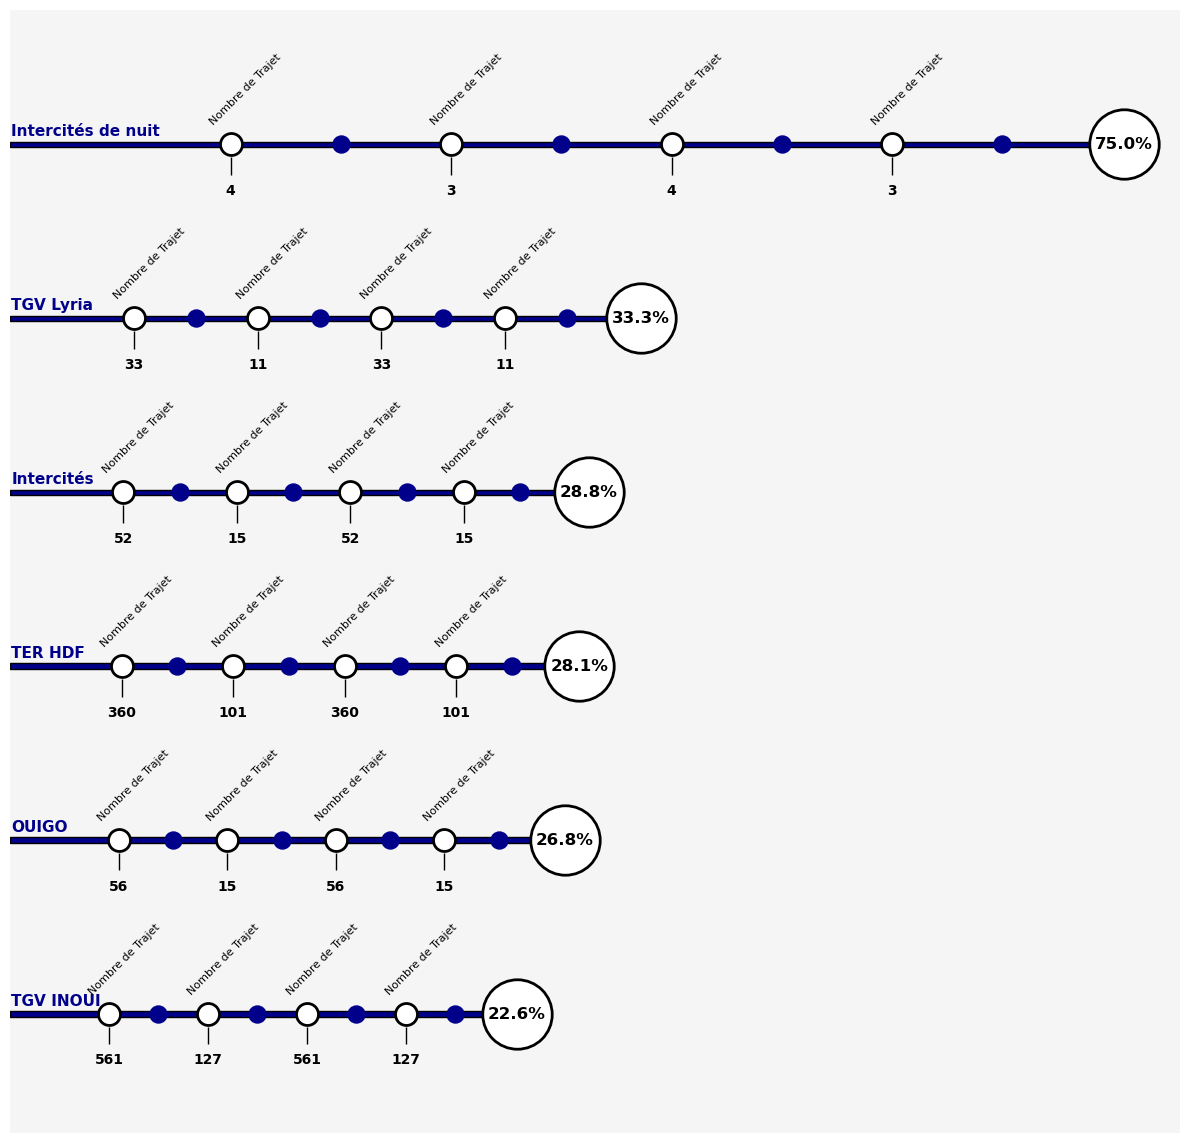

In [43]:
# Je n'ai pas encore décidé des informations à présenter, c'est pourquoi il y a des répétitions
per_disrupted_vehicle_by_network_part1 = dict(per_disrupted_vehicle_by_network[6:])

fig, ax = plt.subplots(figsize=(12, 12))

transformation = {key: (value+20)*0.1 for key, value in per_disrupted_vehicle_by_network_part1.items()}

keys = list(transformation.keys())
values = list(transformation.values())

bars = ax.barh(keys, values, color='darkblue', edgecolor='black', height=0.03)

x_positions = [value + 0.1 for value in values]

ax.scatter(x_positions, list(transformation.keys()), facecolors='white', edgecolors='black', linewidths=2, s=2500)

intervals_white = [0.2, 0.4, 0.6, 0.8]
intervals_black = [0.3, 0.5, 0.7, 0.9]

for j, (bar, new_x) in enumerate(zip(bars, x_positions)):
    y = bar.get_y() + bar.get_height() / 2
    width = bar.get_width()
    
    # Texte pour le pourcentage à droite
    ax.text(new_x, y, f'{width/0.1 - 20:.1f}%', ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Placement des noms des réseaux au début de chaque barre.
    ax.text(0.01, y+0.075, keys[j], ha='left', va='center', fontsize=11, fontweight='bold', color='darkblue')
    
    for i, interval in enumerate(intervals_white):
        circle_x = width * interval
        ax.scatter(circle_x, y, facecolors='white', edgecolors='black', linewidths=2, s=250)
        
        line_start = y - 0.075
        line_end = y - 0.175
        ax.vlines(circle_x, line_start, line_end, colors='black', linewidth=1)
        
        # Texte sous la barre verticale
        text_y_position_below = line_end - 0.05
        current_info_value = info[i][keys[j]]
        ax.text(circle_x, text_y_position_below, f'{current_info_value}', ha='center', va='top', fontsize=10, fontweight='bold')
        
        # Texte au-dessus du cercle
        text_y_position_above = y + 0.1 
        above_text = "Nombre de Trajet" 
        ax.text(circle_x + 0.13, text_y_position_above, above_text, ha='center', va='bottom', fontsize=8, rotation=45)
        
    for interval in intervals_black:
        circle_x = width * interval
        ax.scatter(circle_x, y, facecolors='darkblue', s=150)

ax.set_title('', fontsize=22)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True, ax=ax, offset=10, trim=True)

plt.tight_layout()
ax.set_ylim(bottom=ax.get_ylim()[0] -0.25, top=ax.get_ylim()[1] +0.5)
plt.savefig("Test.png", dpi = 300)

plt.show()

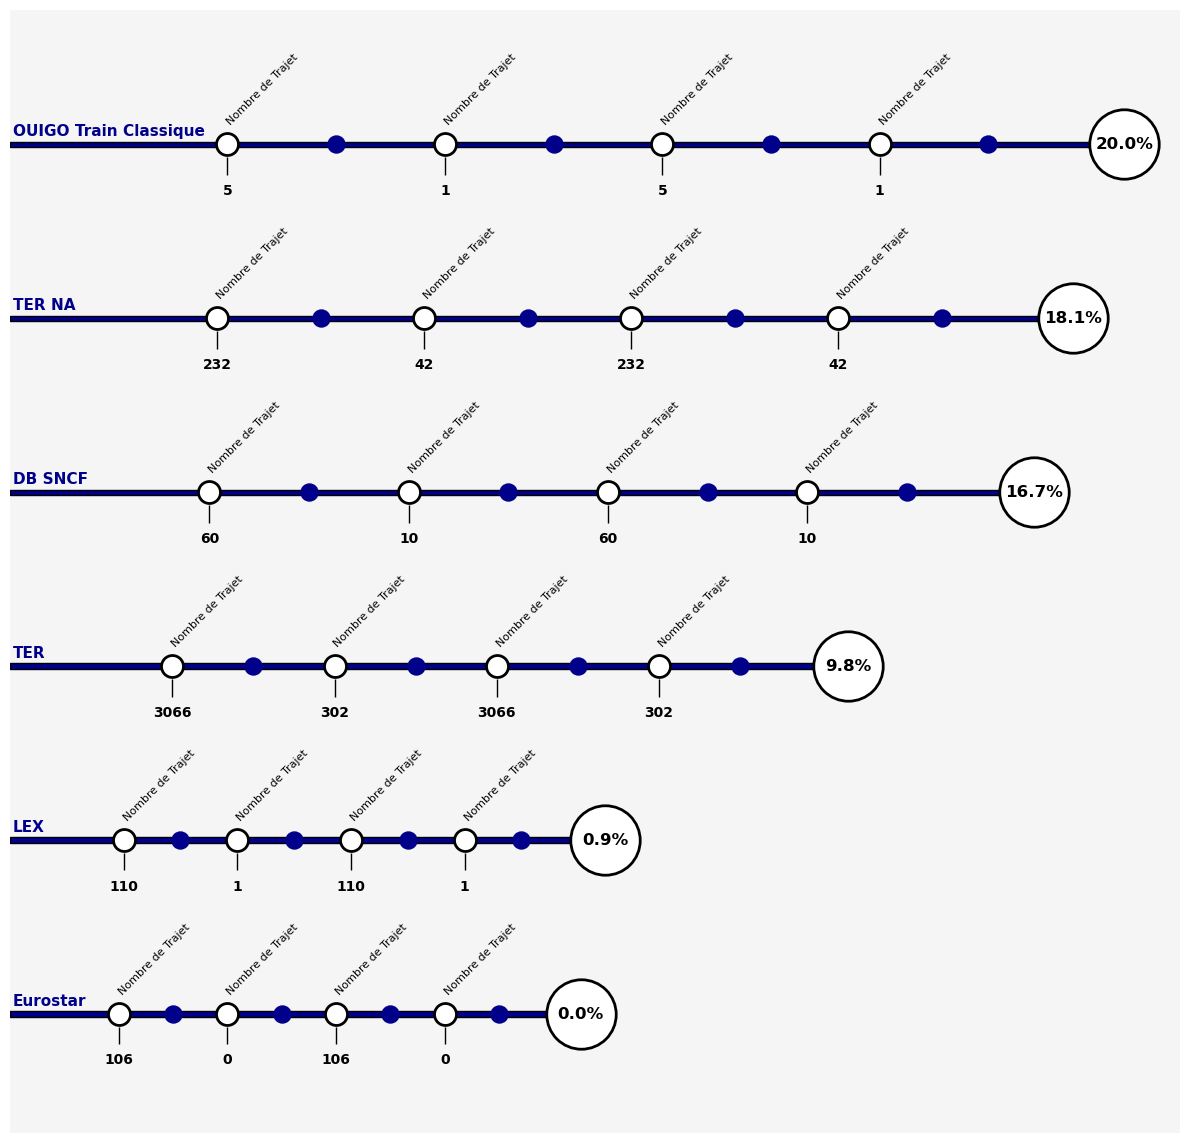

In [44]:
per_disrupted_vehicle_by_network_part2 = dict(per_disrupted_vehicle_by_network[:6])

fig, ax = plt.subplots(figsize=(12, 12))

transformation = {key: (value+20)*0.1 for key, value in per_disrupted_vehicle_by_network_part2.items()}

keys = list(transformation.keys())
values = list(transformation.values())

bars = ax.barh(keys, values, color='darkblue', edgecolor='black', height=0.03)

x_positions = [value + 0.1 for value in values]

ax.scatter(x_positions, list(transformation.keys()), facecolors='white', edgecolors='black', linewidths=2, s=2500)

intervals_white = [0.2, 0.4, 0.6, 0.8]
intervals_black = [0.3, 0.5, 0.7, 0.9]

for j, (bar, new_x) in enumerate(zip(bars, x_positions)):
    y = bar.get_y() + bar.get_height() / 2
    width = bar.get_width()
    
    # Texte pour le pourcentage à droite
    ax.text(new_x, y, f'{width/0.1 - 20:.1f}%', ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Placement des noms des réseaux au début de chaque barre.
    ax.text(0.01, y+0.075, keys[j], ha='left', va='center', fontsize=11, fontweight='bold', color='darkblue')
    
    for i, interval in enumerate(intervals_white):
        circle_x = width * interval
        ax.scatter(circle_x, y, facecolors='white', edgecolors='black', linewidths=2, s=250)
        
        line_start = y - 0.075
        line_end = y - 0.175
        ax.vlines(circle_x, line_start, line_end, colors='black', linewidth=1)
        
        # Texte sous la barre verticale
        text_y_position_below = line_end - 0.05
        current_info_value = info[i][keys[j]]
        ax.text(circle_x, text_y_position_below, f'{current_info_value}', ha='center', va='top', fontsize=10, fontweight='bold')
        
        # Texte au-dessus du cercle
        text_y_position_above = y + 0.1 
        above_text = "Nombre de Trajet" 
        ax.text(circle_x + 0.13, text_y_position_above, above_text, ha='center', va='bottom', fontsize=8, rotation=45)
        
    for interval in intervals_black:
        circle_x = width * interval
        ax.scatter(circle_x, y, facecolors='darkblue', s=150)

ax.set_title('', fontsize=22)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.set_facecolor('whitesmoke')
sns.despine(left=True, bottom=True, ax=ax, offset=10, trim=True)

plt.tight_layout()
ax.set_ylim(bottom=ax.get_ylim()[0] -0.25, top=ax.get_ylim()[1] +0.5)
plt.savefig("Test.png", dpi = 300)

plt.show()

# Routes les plus perturbées en pourcentage (graphique à faire)

In [47]:
vehicle_by_route = df_vehicle_merge.groupby('route_name')['vehicle_id'].count()
vehicle_by_route = vehicle_by_route[vehicle_by_route >= 10]
vehicle_by_route

route_name
(Namur) - (Charleroi) - Maubeuge    14
Alençon - Château Du Loir           12
Ambérieu - Chambery                 12
Amsterdam Centraal - Paris Nord     11
Angers St Laud - Le Mans            25
                                    ..
Tours - Le Croisic                  16
Tours - Saumur - Angers - Nantes    10
Valenciennes - Paris Nord           10
Wissembourg - Neustadt              32
YVETOT - ROUEN - ELBEUF             32
Name: vehicle_id, Length: 172, dtype: int64

In [50]:
disrupted_vehicle_by_route = df_vehicle_merge[df_vehicle_merge['id_disruption'].notna()].groupby('route_name')['vehicle_id'].count()
disrupted_vehicle_by_route

route_name
Alençon - Château Du Loir                        2
Alençon - Le Mans - Tours                        2
Ambérieu - Chambery                              1
Angers St Laud - Le Mans                         2
Annecy - Paris - Gare de Lyon - Hall 1 & 2       4
                                                ..
Tours - Saumur - Bressuire - La Roche sur Yon    1
Tours-Vendôme-Châteaudun                         1
Valenciennes - Paris Nord                        1
Wissembourg - Neustadt                           6
YVETOT - ROUEN - ELBEUF                          1
Name: vehicle_id, Length: 192, dtype: int64

In [65]:
per_disrupted_vehicle_by_route = disrupted_vehicle_by_route/vehicle_by_route *100
winners = per_disrupted_vehicle_by_route.sort_values(ascending=True)[:10]
nb_train_winners = vehicle_by_route.loc[winners.index]
print("Les 10 lignes les moins impactées (min 10 trajets)\n\n" + str(winners) + "\n\n\n")
print("Nombre de trajet des 10 lignes les moins impactées\n\n" + str(nb_train_winners))

Les 10 lignes les moins impactées (min 10 trajets)

route_name
Belfort - Delle                  1.351351
K50                              2.702703
Besancon V -  Besançon Fc        2.941176
Rennes - St-Malo                 3.030303
Charleville - Givet              3.030303
YVETOT - ROUEN - ELBEUF          3.125000
L23                              3.571429
Rennes - Montreuil-Sur-L'Ille    4.000000
Rennes - Messac-Guipry           4.545455
K52                              4.761905
Name: vehicle_id, dtype: float64



Nombre de trajet des 10 lignes les moins impactées

route_name
Belfort - Delle                  74
K50                              37
Besancon V -  Besançon Fc        34
Rennes - St-Malo                 33
Charleville - Givet              33
YVETOT - ROUEN - ELBEUF          32
L23                              28
Rennes - Montreuil-Sur-L'Ille    25
Rennes - Messac-Guipry           22
K52                              21
Name: vehicle_id, dtype: int64


In [66]:
losers = per_disrupted_vehicle_by_route.sort_values(ascending=False)[:10]
nb_train_losers = vehicle_by_route.loc[losers.index]
print("Les 10 lignes les plus impactées (min 10 trajets)\n\n" + str(losers) + "\n\n\n")
print("Nombre de trajet des 10 lignes les plus impactées\n\n" + str(nb_train_losers))

Les 10 lignes les plus impactées (min 10 trajets)

route_name
P42                                                           100.000000
C40                                                            82.500000
K40                                                            72.727273
Paris - Montparnasse - Hall 1 & 2 - Hendaye                    70.000000
Paris Est - Karlsruhe Hauptbahnhof                             60.000000
Grenoble - Paris - Gare de Lyon - Hall 1 & 2                   52.941176
P44                                                            45.833333
Clermont-Ferrand - Paris-Bercy Bourgogne - Pays d'Auvergne     43.750000
L12+                                                           41.666667
Paris - Montparnasse - Hall 1 & 2 - Bordeaux Saint-Jean        41.666667
Name: vehicle_id, dtype: float64



Nombre de trajet des 10 lignes les plus impactées

route_name
P42                                                           20
C40                                          

# Arrêts le plus impactés en nombre et en temps de retard (test graphique)

--> Météo des retards

In [69]:
most_impacted_stop = df_disruption_merge.groupby('name_stop')['vehicle_id'].count().sort_values(ascending=False)[:10]
print("Arrets les plus impactés par les perturbations : \n\n" + str(most_impacted_stop))

Arrets les plus impactés par les perturbations : 

name_stop
Lille Flandres                       76
Lyon Part Dieu                       58
Strasbourg                           52
Bordeaux Saint-Jean                  50
Douai                                41
Paris - Montparnasse - Hall 1 & 2    38
Paris - Gare de Lyon - Hall 1 & 2    36
Arras                                34
Nantes                               33
Amiens                               33
Name: vehicle_id, dtype: int64


In [75]:
total_disruption_time_by_stop = df_disruption_merge.groupby('name_stop')['departure_delay'].sum().sort_values(ascending=False)[:3]
total_disruption_time_by_stop[0], total_disruption_time_by_stop[1] = total_disruption_time_by_stop[1], total_disruption_time_by_stop[0]
print("Temps total de perturbation aux 3 arrêts le plus impacté : \n\n" + str(total_disruption_time_by_stop))

total_disruption_time_by_stop = dict(total_disruption_time_by_stop)
# Petit problème (ou pas) : Les gares les plus impactées sont surement le plus fréquenté

Temps total de perturbation aux 3 arrêts le plus impacté : 

name_stop
Paris - Montparnasse - Hall 1 & 2    1335.0
Bordeaux Saint-Jean                  1335.0
Lille Flandres                       1261.0
Name: departure_delay, dtype: float64


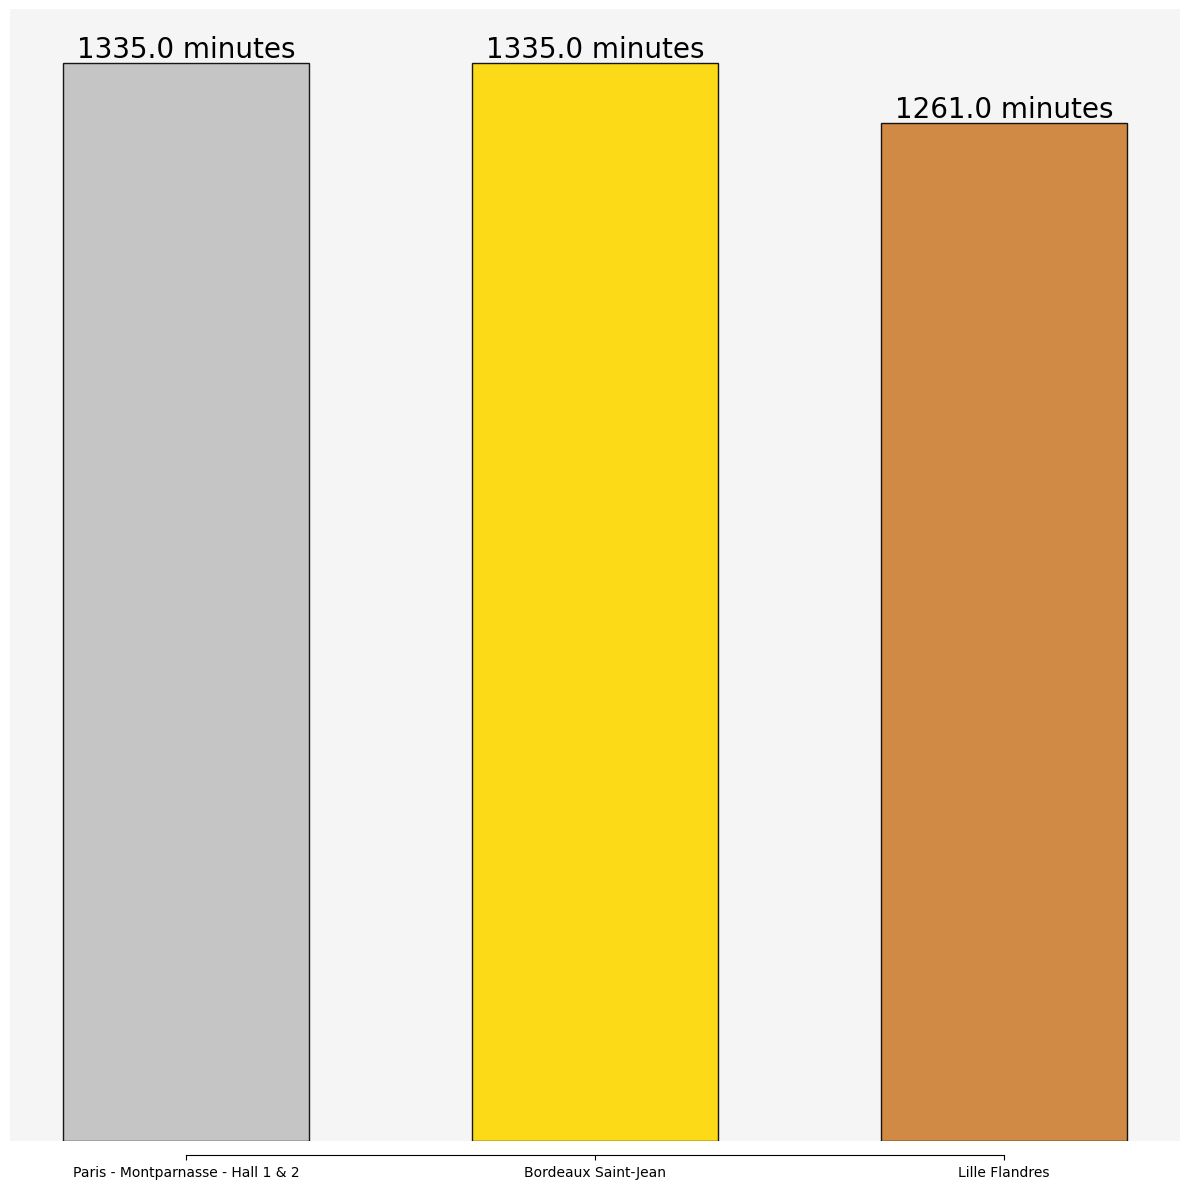

In [76]:
fig, ax = plt.subplots(figsize=(12, 12))

colors = ['#C0C0C0','#FFD700', '#CD7F32']
bars = ax.bar(total_disruption_time_by_stop.keys(), total_disruption_time_by_stop.values(), color=colors, edgecolor='black', width=0.6, alpha = 0.9, zorder=1)

ax.set_title('', fontsize=40)
ax.axes.get_yaxis().set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height, f'{height} minutes', ha='center', va='bottom', fontsize=20)

ax.set_facecolor('whitesmoke')
sns.despine(left=True, ax=ax, offset=10, trim=True)
plt.tight_layout()

plt.show()

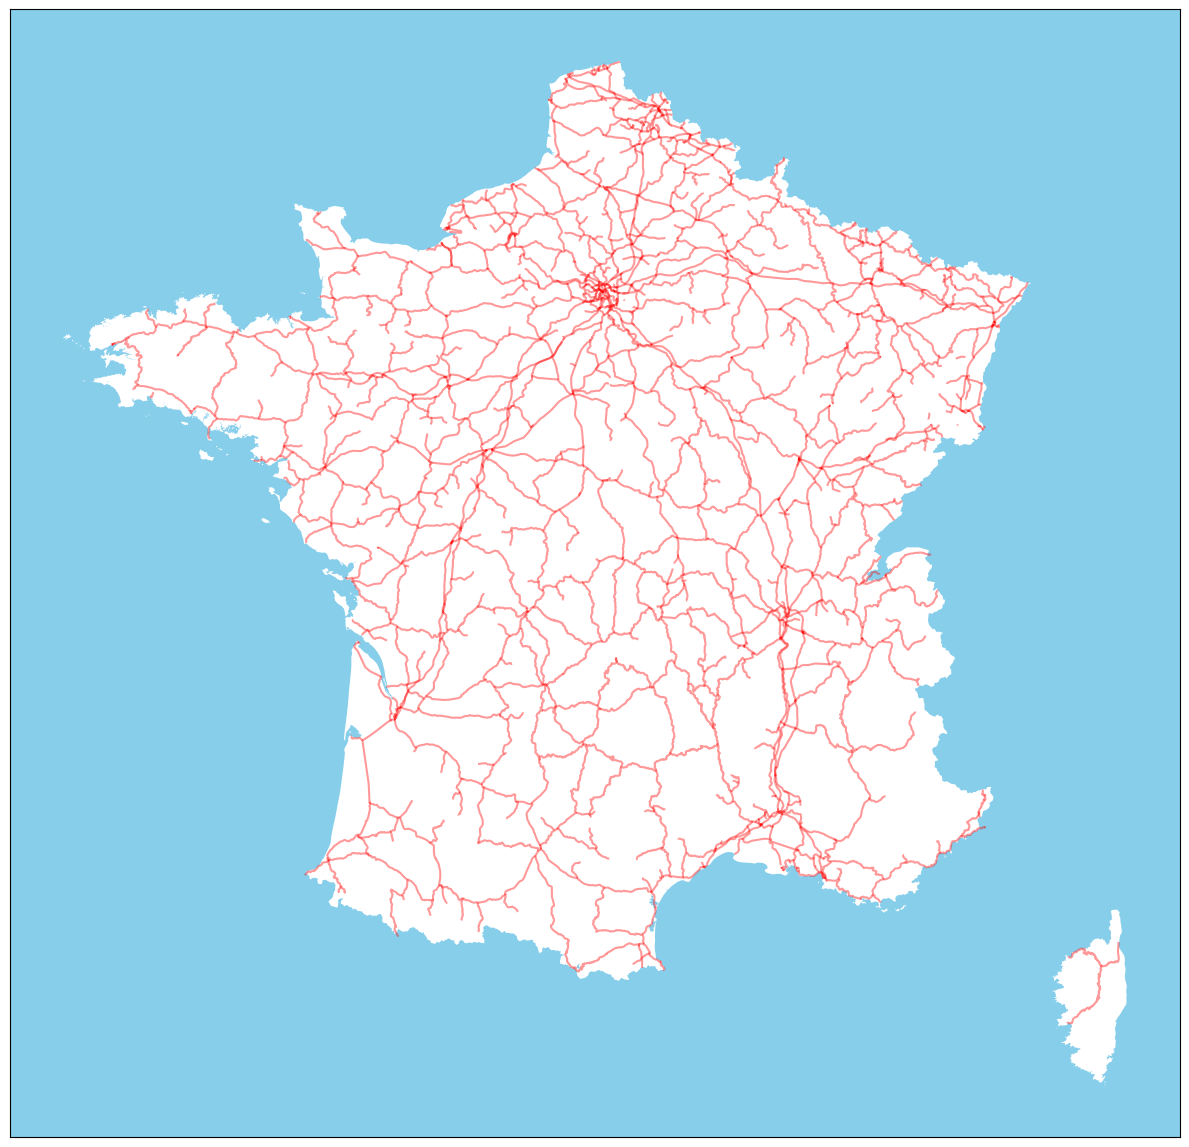

In [88]:
# En rouge c'est le réseau féroviere francais --> ajouter les pays voisins car les données contiennent aussi
# les pays qui partagent une ligne commune avec la France

fig, ax = plt.subplots(figsize=(12, 12))

resau = gpd.read_file('formes-des-lignes-du-rfn/formes-des-lignes-du-rfn.shp')
france = gpd.read_file('data/FRA_adm0.shp')
ax.set_facecolor('skyblue')

france.plot(ax=ax, color='white')
resau.plot(ax=ax, color='red', alpha=0.4)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()

plt.show()

# Causes de perturbation les plus/moins fréquentes

In [91]:
# En réalité pas de plus ou moins car contient toutes les causes de perturbation
most_causes_disruption = df_disruption_unique.groupby('cause_delay')['id_disruption'].count().sort_values(ascending=True)[:100]
print("cause de perturbation les moins fréquentes de la journée : \n\n" + str(most_causes_disruption))

cause de perturbation les moins fréquentes de la journée : 

cause_delay
Accident de personne                                       1
Assistance à un voyageur malade à bord                     1
Dérangement d'un équipement technique ou informatique      1
Grève SNCF inopinée                                        1
Présence d'individus sur les voies                         2
Modification de matériel                                   2
Incident de circulation                                    2
Intervention des forces de l'ordre                         3
Présence d'un bagage abandonné                             6
Panne d'un aiguillage                                      6
Accident à un passage à niveau                             7
Saturation des voies en gare                               8
Indisponibilité d'un matériel                             10
Arrêt exceptionnel en gare                                10
Incident sur un réseau ferré étranger                     11
Dérangement 

In [93]:
print("pourcentage d'apparaition de chacune des causes : \n\n" + str(most_causes_disruption/nb_disruption*100))

pourcentage d'apparaition de chacune des causes : 

cause_delay
Accident de personne                                      0.151745
Assistance à un voyageur malade à bord                    0.151745
Dérangement d'un équipement technique ou informatique     0.151745
Grève SNCF inopinée                                       0.151745
Présence d'individus sur les voies                        0.303490
Modification de matériel                                  0.303490
Incident de circulation                                   0.303490
Intervention des forces de l'ordre                        0.455235
Présence d'un bagage abandonné                            0.910470
Panne d'un aiguillage                                     0.910470
Accident à un passage à niveau                            1.062215
Saturation des voies en gare                              1.213961
Indisponibilité d'un matériel                             1.517451
Arrêt exceptionnel en gare                                1.51745

# Temps de la journée sans perturbation

In [94]:
# Pas pertinent de cette manière --> le faire soit par gare, réseau ou ligne

df_disruption_start_sorted = df_disruption_unique.sort_values(by = 'disruption_start', ascending=True)
df_disruption_start_sorted = df_disruption_start_sorted.reset_index(drop=True)
df_disruption_start_sorted

,id_disruption,vehicle_id,train_type,id_stop,name_stop,lon,lat,disruption_start,disruption_end,arrival_delay,departure_delay,cause_delay,data_date,duration
0,11c262dd-4115-4932-b778-a30b5b80b34b,SNCF:2024-03-18:843850:1187:Train,TER / Intercités,stop_point:SNCF:87286005:Train,Lille Flandres,3.06987,50.6366,2024-03-18 04:51:00,2024-03-18 07:18:00,NaN,40.0,Travaux sur les voies,2024-03-18,0 days 02:27:00
1,030e6175-67a1-4bdd-a75f-6bd8f1b240b5,SNCF:2024-03-18:17752:1187:LongDistanceTrain,TGV,stop_point:SNCF:87683003:LongDistanceTrain,Sens,3.26783,48.1979,2024-03-18 05:00:00,2024-03-18 10:30:00,5.0,5.0,Conditions de départ non réunies,2024-03-18,0 days 05:30:00
2,5ce1d30c-5f87-48e5-8e4b-de87c5eaa6ee,SNCF:2024-03-18:839110:1187:Train,TER / Intercités,stop_point:SNCF:87113001:Train,Paris Est,2.35842,48.8767,2024-03-18 05:12:00,2024-03-18 06:58:00,5.0,5.0,Difficultés lors de la préparation du train,2024-03-18,0 days 01:46:00
3,ab961189-51e1-46c0-97cc-8f890edfa648,SNCF:2024-03-18:842300:1187:Train,TER / Intercités,stop_point:SNCF:87317065:Train,Étaples - Le Touquet,1.64258,50.5165,2024-03-18 05:15:00,2024-03-18 07:12:00,5.0,5.0,Réutilisation d'un train,2024-03-18,0 days 01:57:00
4,127cbdce-9371-459e-8308-b8148301569a,SNCF:2024-03-18:8602:1187:LongDistanceTrain,TGV,stop_point:SNCF:87391003:LongDistanceTrain,Paris - Montparnasse - Hall 1 & 2,2.32051,48.8412,2024-03-18 05:19:00,2024-03-18 09:18:30,10.0,10.0,Heurt d'un animal,2024-03-18,0 days 03:59:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,e7e39b4e-99a1-42ec-8868-003d16bcd0d6,SNCF:2024-03-18:891155:1187:Train,TER / Intercités,stop_point:SNCF:87683003:Train,Sens,3.26783,48.1979,2024-03-18 22:35:00,2024-03-19 00:22:00,10.0,10.0,Régulation du trafic,2024-03-18,0 days 01:47:00
655,40491f17-64cb-4dd1-b3b7-41a5887099d6,SNCF:2024-03-18:831315:1187:Train,TER / Intercités,stop_point:SNCF:87212027:Train,Strasbourg,7.73479,48.5845,2024-03-18 22:37:00,2024-03-18 23:24:30,5.0,5.0,None,2024-03-18,0 days 00:47:30
656,31a9d3cc-a863-4336-b9e1-78c927441789,SNCF:2024-03-18:88783:1187:Train,TER / Intercités,stop_point:SNCF:82001000:Train,Luxembourg,6.13472,49.5997,2024-03-18 22:39:00,2024-03-18 23:08:00,0.0,0.0,Arrêt exceptionnel en gare,2024-03-18,0 days 00:29:00
657,6f8f1275-c3ae-4cae-b5df-8800862b3f56,SNCF:2024-03-18:14079:1187:Train,TER / Intercités,stop_point:SNCF:87543009:Train,Orléans,1.90424,47.9079,2024-03-18 22:50:00,2024-03-19 01:01:00,60.0,60.0,Panne de signalisation,2024-03-18,0 days 02:11:00


In [96]:
time_without_disruption = 0
for t in range(1,len(df_disruption_start_sorted)):
    if df_disruption_start_sorted['disruption_start'][t]> df_disruption_start_sorted['disruption_end'][t-1]:
        time_without_disruption += df_disruption_start_sorted['disruption_start'][t]- df_disruption_start_sorted['disruption_end'][t-1]
            
time_without_disruption

0